# Mod 4 Project 

Student - Robert Fustero <br>
Instructor - Brandon <br>

This project involves Time Series Modeling - I will be using SARIMA (Seasonal Auto Regressive Integrated Moving Average) to model housing prices for the chosen zipcodes

# Load the Data/Filtering for Chosen Zipcodes

In [5]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import numpy as np
from pandas.core import datetools
from pandas import Series
import warnings
import sklearn.metrics as sk
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('zillow_data.csv')
df['RegionName'] = df['RegionName'].astype(str)
df = df.drop(columns = ['RegionID','SizeRank'])
df.head()

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Choosing best zip codes by ROI

I made a function that calculates the top 5 ROIs from after 2010 til 2019 in the Mid-Atlantic and returns the zip codes<br>
Essentially the zipcodes that had the best bounce back after the economic crisis.<br>
I chose zipcodes close to me to show potential employers<br>

In [7]:
def roicalc(df):
    try:
        return (df.iloc[264]-df.iloc[165])/df.iloc[165]
    except:
        return 0

In [8]:
#Function that turns main df rows into singular time series dataframes to analyze
def melt_data(df, region):
    melted = pd.melt(df[df.RegionName == region], id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [9]:
#algorithm to find best zipcodes based on ROI
def Best(df):
    maxroi = {}
    topregs = []
    for region in df[(df.State=='VA')|(df.State=='WV')|(df.State=='MD')].RegionName:
        newdf = melt_data(df,region)
        newdfdiff = newdf.diff(periods=1)
        newdfdiff = newdfdiff.dropna()
        roi = float(roicalc(newdf))
        if roi > .4:
            maxroi[str(region)]=roi
    toprois = list(maxroi.values())
    toprois.sort()
    toprois = toprois[-5:]
    for key, value in maxroi.items():
        if value in toprois:
            topregs.append(key)
    return topregs

In [207]:
#method to return results after modeling
def get_results(df, preds, name):
    if 'pandas.core.frame.DataFrame' in str(type(df)):
        current_price = df.iloc[-1].value
    else:
        current_price = df[-1]
    year_later = preds[11]
    year_3_val = preds[35]
    year_5_val = preds[59]
    print("Current Avg Median Home Value in {}: ${:.2f}".format(name, current_price))
    print("Predicted Avg Median Home Value for {} in April 2019: ${:.2f}".format(name, year_later))
    expected_appreciation_value_1 = year_later - current_price
    expected_appreciation_percent_1 = expected_appreciation_value_1 / current_price
    expected_appreciation_value_3 = year_3_val - current_price
    expected_appreciation_percent_3 = expected_appreciation_value_3 / current_price
    expected_appreciation_value_5 = year_5_val - current_price
    expected_appreciation_percent_5 = expected_appreciation_value_5 / current_price
    print("Expected property value appreciation for 1 year in {} :  ${:.2f}".format(name, expected_appreciation_value_1))
    print("Expected Return on Investment after 1 year:  {:.4f}%".format(expected_appreciation_percent_1 * 100))
    print("Expected property value appreciation for 3 years in {} :  ${:.2f}".format(name, expected_appreciation_value_3))
    print("Expected Return on Investment after 3 years:  {:.4f}%".format(expected_appreciation_percent_3 * 100))
    print("Expected property value appreciation for 5 years in {} :  ${:.2f}".format(name, expected_appreciation_value_5))
    print("Expected Return on Investment after 5 years:  {:.4f}%".format(expected_appreciation_percent_5 * 100))

In [10]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

### Select best zipcodes

In [11]:
Best(df)

['20109', '20781', '20712', '20710', '20722']

In [12]:
ziplist = ['20109', '20781', '20712', '20710', '20722']

In [13]:
df[(df.RegionName=='20109')|(df.RegionName=='20781')|(df.RegionName=='20712')|(df.RegionName=='20710')|(df.RegionName=='20722')]

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2241,20109,Manassas,VA,Washington,Prince William,124200.0,124300.0,124500.0,124600.0,124700.0,...,285900,286800,287500,288900,290900,293000,294900,297200,299600,301000
7928,20781,Hyattsville,MD,Washington,Prince Georges,116600.0,116500.0,116300.0,116100.0,116000.0,...,323900,324300,325500,328000,330600,332700,336300,339600,343400,347600
8560,20712,Mount Rainier,MD,Washington,Prince Georges,104100.0,103700.0,103200.0,102800.0,102400.0,...,340000,341800,344700,347700,350200,353700,359600,364800,367000,368300
8652,20710,Bladensburg,MD,Washington,Prince Georges,106500.0,106300.0,106000.0,105800.0,105600.0,...,260300,262400,266000,269700,271900,270600,268400,266800,267500,268500
11134,20722,Brentwood,MD,Washington,Prince Georges,99300.0,98800.0,98300.0,97800.0,97300.0,...,265100,267100,269800,272600,274700,276100,277300,278900,281700,284100


In [14]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

In [15]:
df1 = melt_data(df,'20109')
df2 = melt_data(df,'20781')
df3 = melt_data(df,'20712')
df4 = melt_data(df,'20710')
df5 = melt_data(df,'20722')

In [16]:
dflist = [df1,df2,df3,df4,df5]

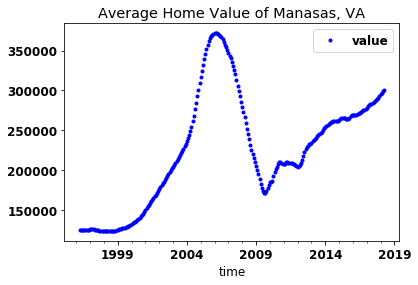

In [17]:
df1.plot(title='Average Home Value of Manasas, VA',style='b.');


# SARIMA Modeling

Seasonal Autoregressive Integrated Moving Average, SARIMA, is an extension of ARIMA that explicitly supports univariate(series that consists of single (scalar) observations recorded sequentially over equal time increments) time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

* p: Trend autoregression order.<br>
* d: Trend difference order.<br>
* q: Trend moving average order.<br>

* P: Seasonal autoregressive order.<br>
* D: Seasonal difference order.<br>
* Q: Seasonal moving average order.<br>
* m: The number of time steps for a single seasonal period.<br>

### For example
##### SARIMA(1,1,1)(1,1,0)12
The number at the end 12 - represents a yearly cycle<br>
I will use the AIC method to find the most effective variables for the model

## Mean Absolute Error

Mean absolute error (MAE) is a measure of difference between two continuous variables.
It's is an average of the absolute errors.  I will use this to check the validity of the models

In [21]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

## ARIMA Model for Manasas, VA


In [83]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dflist[0],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           4644.98
Name: 19, dtype: object

In [223]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(dflist[0],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9077      0.014     65.935      0.000       0.881       0.935
ma.L1         -0.7498      0.014    -55.503      0.000      -0.776      -0.723
ma.S.L12      -0.0819      0.010     -8.411      0.000      -0.101      -0.063
sigma2       5.04e+06   1.35e-10   3.72e+16      0.000    5.04e+06    5.04e+06


The **P>|z|** provides  the significance of each feature weight. 

We can see that the p-values are lower than .05 so it's reasonable to retain all the features.


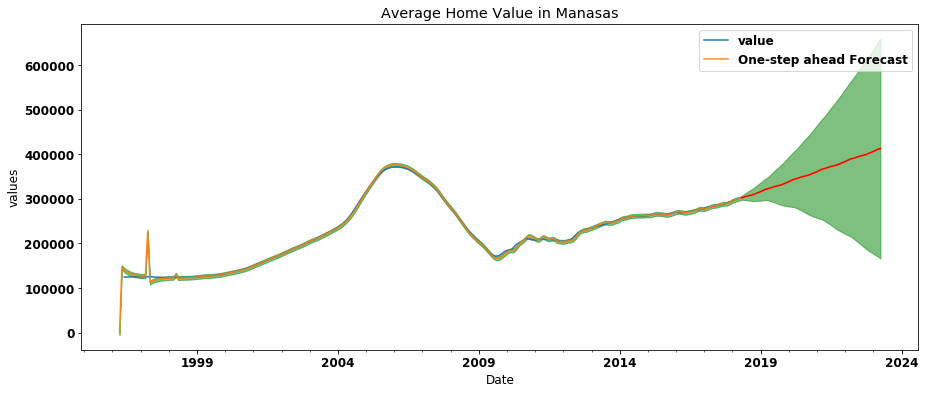

Mean Absolute Error: 2625.94


In [224]:
pred = output.get_prediction(end=324,dynamic=False)
pred_conf = pred.conf_int()
# Set axes labels
plt.rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = dflist[0]['1996-06-01':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('values')
plt.legend()
output.forecast(steps=60).plot(title='Average Home Value in Manasas',ax=ax,color='red');
plt.show()

mae = sk.mean_absolute_error(dflist[0],pred.predicted_mean[:265])
print('Mean Absolute Error: '+str(round(mae,2)))

In [160]:
get_results(dflist[0],output.forecast(steps=60),'Manasas')

Current Avg Median Home Value in Manasas: $301000.00
Predicted Avg Median Home Value for Manasas in April 2019: $322550.72
Expected property value appreciation for 1 year in Manasas :  $21550.72
Expected Return on Investment after 1 year:  7.1597%
Expected property value appreciation for 3 years in Manasas :  $66482.61
Expected Return on Investment after 3 years:  22.0872%
Expected property value appreciation for 5 years in Manasas :  $111841.13
Expected Return on Investment after 5 years:  37.1565%


### Conclusion
Manassas has a very high retrun and a low MAE.  It would be a good place to invest in.

## ARIMA Model for Hyattsville, MD

In [161]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dflist[1],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4644.76
Name: 30, dtype: object

In [221]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(dflist[1],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9266      0.025     37.088      0.000       0.878       0.976
ma.L1         -0.8287      0.024    -33.839      0.000      -0.877      -0.781
ar.S.L12       0.7523      0.031     23.953      0.000       0.691       0.814
ma.S.L12      -1.0000      0.077    -13.065      0.000      -1.150      -0.850
sigma2      5.159e+06   1.48e-08   3.48e+14      0.000    5.16e+06    5.16e+06


The **P>|z|** provides  the significance of each feature weight. 

We can see that the p-values are lower than .05 so it's reasonable to retain all the features.

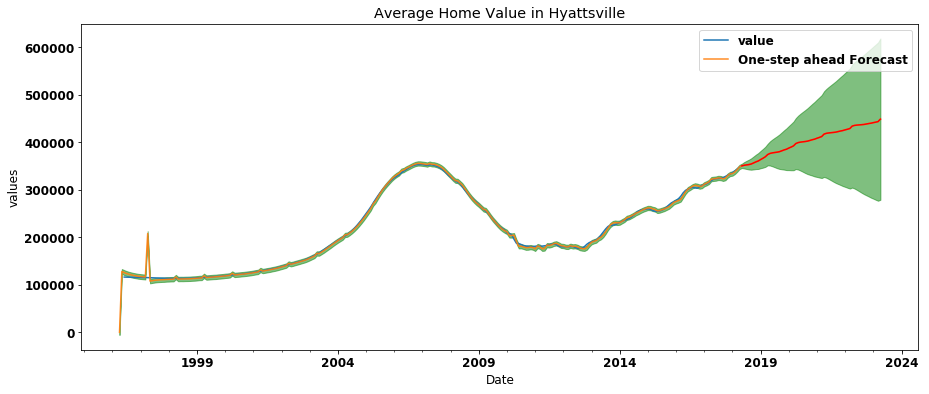

Mean Absolute Error: 2722.06


In [222]:
pred = output.get_prediction(end=324,dynamic=False)
pred_conf = pred.conf_int()
# Set axes labels
plt.rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = dflist[1]['1996-06-01':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('values')
plt.legend()

output.forecast(steps=60).plot(title='Average Home Value in Hyattsville',ax=ax,color='red');

plt.show()

mae = sk.mean_absolute_error(dflist[1],pred.predicted_mean[:265])
print('Mean Absolute Error: '+str(round(mae,2)))

In [165]:
get_results(dflist[1],output.forecast(steps=60),'Hyattsville')

Current Avg Median Home Value in Hyattsville: $347600.00
Predicted Avg Median Home Value for Hyattsville in April 2019: $374169.37
Expected property value appreciation for 1 year in Hyattsville :  $26569.37
Expected Return on Investment after 1 year:  7.6437%
Expected property value appreciation for 3 years in Hyattsville :  $69594.99
Expected Return on Investment after 3 years:  20.0216%
Expected property value appreciation for 5 years in Hyattsville :  $101142.66
Expected Return on Investment after 5 years:  29.0974%


### Conclusion
Hyattsville has a very high retrun and a low MAE.  It would be a good place to invest in.

## ARIMA Model for Mount Rainier

In [97]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dflist[2],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4701.96
Name: 28, dtype: object

In [225]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(dflist[2],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6995      0.050     14.061      0.000       0.602       0.797
ma.L1         -0.5173      0.052     -9.961      0.000      -0.619      -0.416
ar.S.L12       0.6954      0.033     21.229      0.000       0.631       0.760
ma.S.L12      -1.0000      0.090    -11.134      0.000      -1.176      -0.824
sigma2       6.39e+06   1.41e-08   4.55e+14      0.000    6.39e+06    6.39e+06


Again, low p-values so we can reatin all features

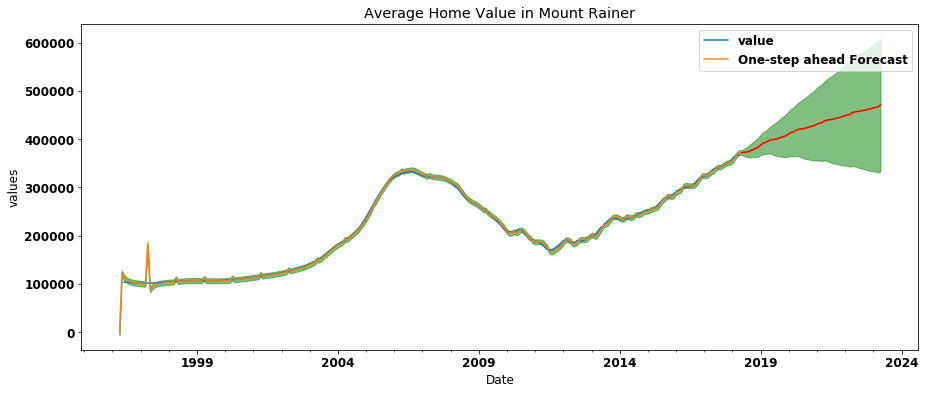

Mean Absolute Error: 2728.5


In [226]:
pred = output.get_prediction(end=324,dynamic=False)
pred_conf = pred.conf_int()
# Set axes labels
plt.rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = dflist[2]['1996-06-01':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('values')
plt.legend()
output.forecast(steps=60).plot(title='Average Home Value in Mount Rainer',ax=ax,color = 'red');


plt.show()
mae = sk.mean_absolute_error(dflist[2],pred.predicted_mean[:265])
print('Mean Absolute Error: '+str(round(mae,2)))

In [77]:
get_results(dflist[2],output.forecast(steps=60),'Mount Rainier')

Current Avg Median Home Value in Mount Rainier: $368300.00
Predicted Avg Median Home Value for Mount Rainier in April 2019: $395278.20
Expected property value appreciation for 1 year in Mount Rainier :  $26978.20
Expected Return on Investment after 1 year:  7.3251%
Expected property value appreciation for 3 years in Mount Rainier :  $69017.95
Expected Return on Investment after 3 years:  18.7396%
Expected property value appreciation for 5 years in Mount Rainier :  $102256.58
Expected Return on Investment after 5 years:  27.7645%


### Conclusion
Mt. Rainer has a very high retrun and a low MAE.  It would be a good place to invest in.

## ARIMIA Model for Bladensburg

In [69]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dflist[3],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4681.19
Name: 28, dtype: object

In [219]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(dflist[3],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8108      0.036     22.451      0.000       0.740       0.882
ma.L1         -0.6436      0.038    -17.013      0.000      -0.718      -0.569
ar.S.L12       0.7195      0.033     22.094      0.000       0.656       0.783
ma.S.L12      -1.0000      0.078    -12.802      0.000      -1.153      -0.847
sigma2      5.899e+06   1.32e-08   4.46e+14      0.000     5.9e+06     5.9e+06


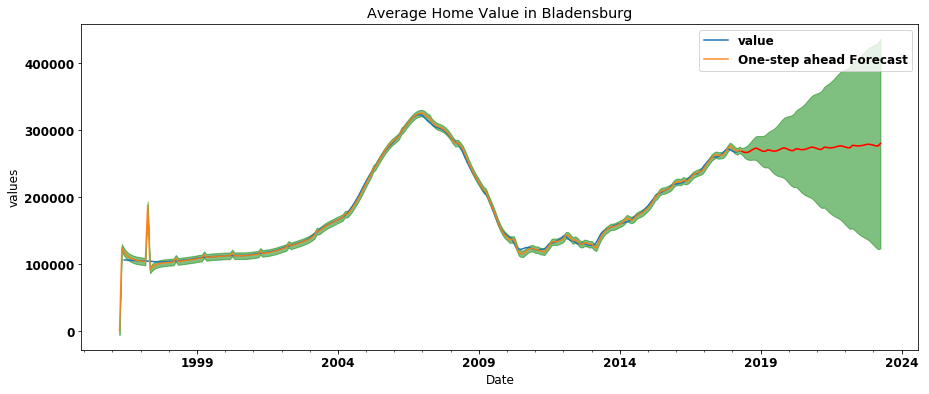

Mean Absolute Error: 2655.36


In [220]:
pred = output.get_prediction(end=324,dynamic=False)
pred_conf = pred.conf_int()
# Set axes labels
plt.rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = dflist[3]['1996-06-01':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('values')
plt.legend()
output.forecast(steps=60).plot(title='Average Home Value in Bladensburg',ax=ax,color = 'red');
plt.show()
mae = sk.mean_absolute_error(dflist[3],pred.predicted_mean[:265])
print('Mean Absolute Error: '+str(round(mae,2)))

In [152]:
get_results(dflist[3],output.forecast(steps=60),'Bladensburg')

Current Avg Median Home Value in Bladensburg: $268500.00
Predicted Avg Median Home Value for Bladensburg in April 2019: $270149.12
Expected property value appreciation for 1 year in Bladensburg :  $1649.12
Expected Return on Investment after 1 year:  0.6142%
Expected property value appreciation for 3 years in Bladensburg :  $5664.24
Expected Return on Investment after 3 years:  2.1096%
Expected property value appreciation for 5 years in Bladensburg :  $11393.44
Expected Return on Investment after 5 years:  4.2434%


### Conclusion
Bladensburg does not have as promising as a trajectory even though it recovered from the 2009 economic crisis well.  This zipcode would be a risky investment.

## ARIMA Model for Brentwood

In [78]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dflist[4],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4619.27
Name: 28, dtype: object

In [216]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(dflist[4],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8952      0.024     37.080      0.000       0.848       0.943
ma.L1         -0.7557      0.024    -30.871      0.000      -0.804      -0.708
ar.S.L12       0.7156      0.032     22.063      0.000       0.652       0.779
ma.S.L12      -1.0000      0.072    -13.853      0.000      -1.141      -0.859
sigma2      4.546e+06   1.59e-08   2.86e+14      0.000    4.55e+06    4.55e+06


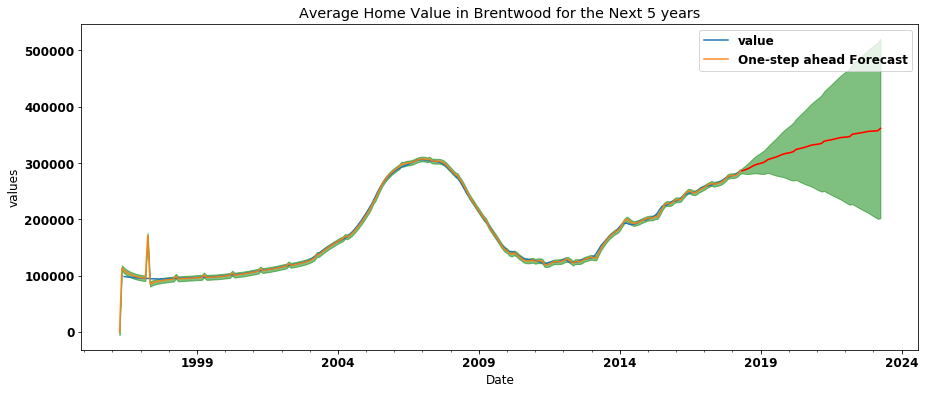

Mean Absolute Error: 2428.2


In [217]:
pred = output.get_prediction(end=324,dynamic=False)
pred_conf = pred.conf_int()
# Set axes labels
plt.rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = dflist[4]['1996-06-01':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('values')
plt.legend()
output.forecast(steps=60).plot(title='Average Home Value in Brentwood for the Next 5 years',ax=ax,color='red');
plt.show()
plt.show()
mae = sk.mean_absolute_error(dflist[4],pred.predicted_mean[:265])
print('Mean Absolute Error: '+str(round(mae,2)))


In [218]:
get_results(dflist[4],output.forecast(steps=60),'Brentwood')

Current Avg Median Home Value in Brentwood: $284100.00
Predicted Avg Median Home Value for Brentwood in April 2019: $305776.92
Expected property value appreciation for 1 year in Brentwood :  $21676.92
Expected Return on Investment after 1 year:  7.6300%
Expected property value appreciation for 3 years in Brentwood :  $54500.37
Expected Return on Investment after 3 years:  19.1835%
Expected property value appreciation for 5 years in Brentwood :  $77372.46
Expected Return on Investment after 5 years:  27.2342%


### Conclusion
Brentwood has a good retrun and a low MAE.  It would be a good place to invest in, especially within the next year.

## Future Work
Possible things I could improve would be to add a higher range of numbers for the AIC. <br>
I might also try to different forecasting techniques (like LSTMs) rather than just one-step ahead forecasting.<br>
SARIMA analysis tends to over value tiny dips if they happened recently - it would be interesting to use multi-variate LM